# South Korea vs China

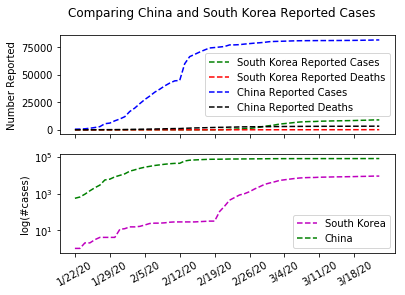

% of total South Korean population reported infected = 0.017410141830192346
% of total China population reported infected = 0.005668130795849435


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try: 
    dfc = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
except IOError:
    print('Something went wrong. Check path, and make sure you have the latest file updates.')
    exit()
try: 
    dfd = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
except IOError:
    print('Something went wrong. Check path, and make sure you have the latest file updates.')
    exit()
# Slicing out Japan
skor_dfc = dfc[dfc['Country/Region'] == 'Korea, South']
skor_dfd = dfd[dfd['Country/Region'] == 'Korea, South']
# Removing extraneous data from df
skor_dfc = skor_dfc.drop(columns = ['Province/State','Country/Region', 'Lat', 'Long'])
skor_dfd = skor_dfd.drop(columns = ['Province/State','Country/Region', 'Lat', 'Long'])
# summing columns
skor_dfc = skor_dfc.sum()
skor_dfd = skor_dfd.sum()
# creating dataframes for plotting
skor_dict_conf = {'South Korea Total':skor_dfc}
skor_df_conf = pd.DataFrame(skor_dict_conf)
skor_dict_dead = {'South Korea Total':skor_dfd}
skor_df_dead = pd.DataFrame(skor_dict_dead)

# Slicing out China
china_dfc = dfc[dfc['Country/Region'] == 'China']
china_dfd = dfd[dfd['Country/Region'] == 'China']
# Dropping irrelevant data
china_dfc = china_dfc.drop(columns = ['Province/State','Country/Region', 'Lat', 'Long'])
china_dfd = china_dfd.drop(columns = ['Province/State','Country/Region', 'Lat', 'Long'])
# summing data
china_dfc = china_dfc.sum()
china_dfd = china_dfd.sum()
# new dataframes for plotting
china_dict_conf = {'China Total': china_dfc}
china_df_conf = pd.DataFrame(china_dict_conf)
china_dict_dead = {'China Total': china_dfd}
china_df_dead = pd.DataFrame(china_dict_dead)

# Plotting data
# Confirmed cases & deaths
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Comparing China and South Korea Reported Cases')
ax1.set_ylabel('Number Reported')
ax1.plot(skor_df_conf, 'g--', label='South Korea Reported Cases')
ax1.plot(skor_df_dead, 'r--', label='South Korea Reported Deaths')
ax1.plot(china_df_conf, 'b--', label='China Reported Cases')
ax1.plot(china_df_dead, 'k--', label='China Reported Deaths')
ax1.legend()

# log y axis
plt.yscale('log')
plt.xticks(np.arange(0,len(china_df_conf), step=7), rotation=30)
ax2.set_ylabel('log(#cases)')
# print(skor_df_conf)
ax2.plot(skor_df_conf, 'm--', label='South Korea')
ax2.plot(china_df_conf, 'g--', label='China')
plt.legend(loc='lower right')
plt.show()


pop_skor = 51470000
cases_skor = skor_df_conf.iloc[-1]
pct_kor = (cases_skor/pop_skor)*100
print('% of total South Korean population reported infected = '+ str(pct_kor.iloc[0]))
pop_china = 1437828500
cases_china=china_df_conf.iloc[-1]
pct_china=(cases_china/pop_china)*100
print('% of total China population reported infected = '+ str(pct_china.iloc[0]))